# Numerical Exercise 04

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
names = ["solid", "liquid", "gas"]



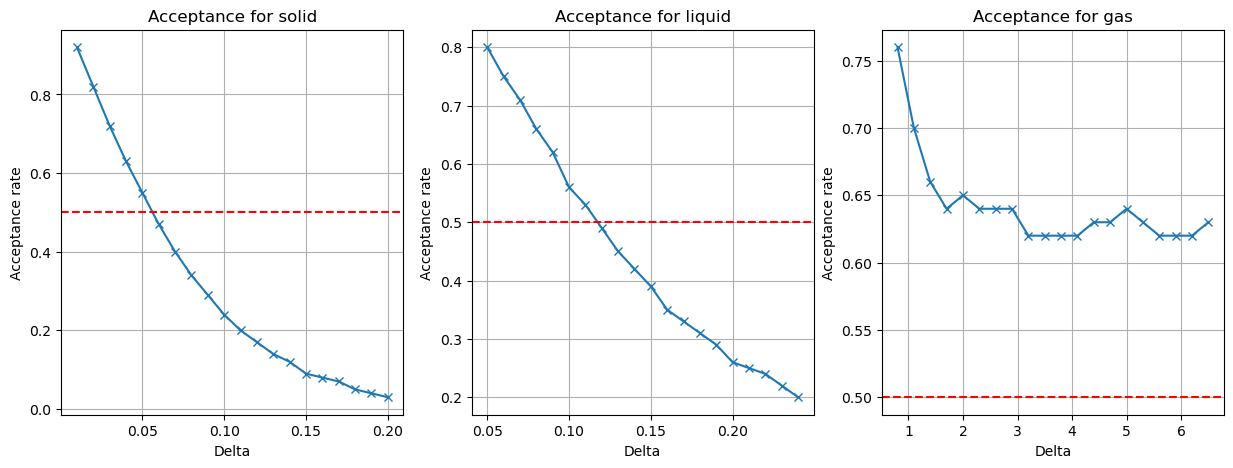

In [21]:
fig = plt.figure(figsize=(15,5))
for i in range(3):
    temp, delta, acceptance = np.loadtxt("../data/ex07_acceptance_{phase}.dat".format(phase=names[i]), unpack=True, usecols=(0,1,2), skiprows=1)
    fig.add_subplot(1,3,i+1)
    plt.plot(delta, acceptance, marker="x")
    plt.title("Acceptance for {phase}".format(phase=names[i]))
    plt.xlabel("Delta")
    plt.ylabel("Acceptance rate")
    plt.grid(True)
    plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

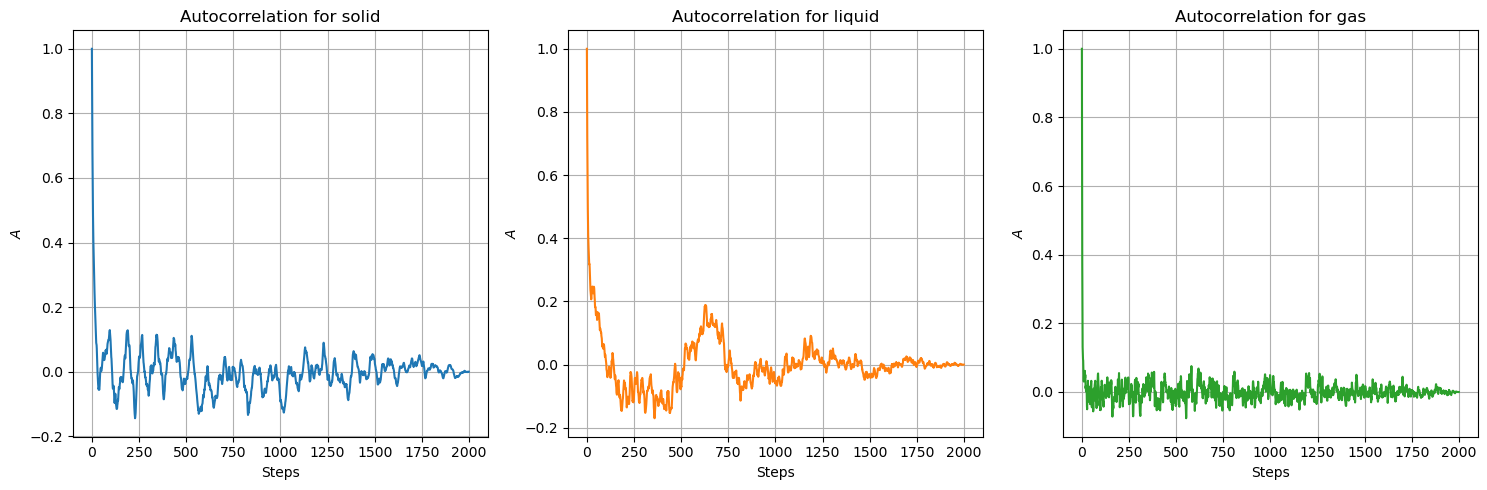

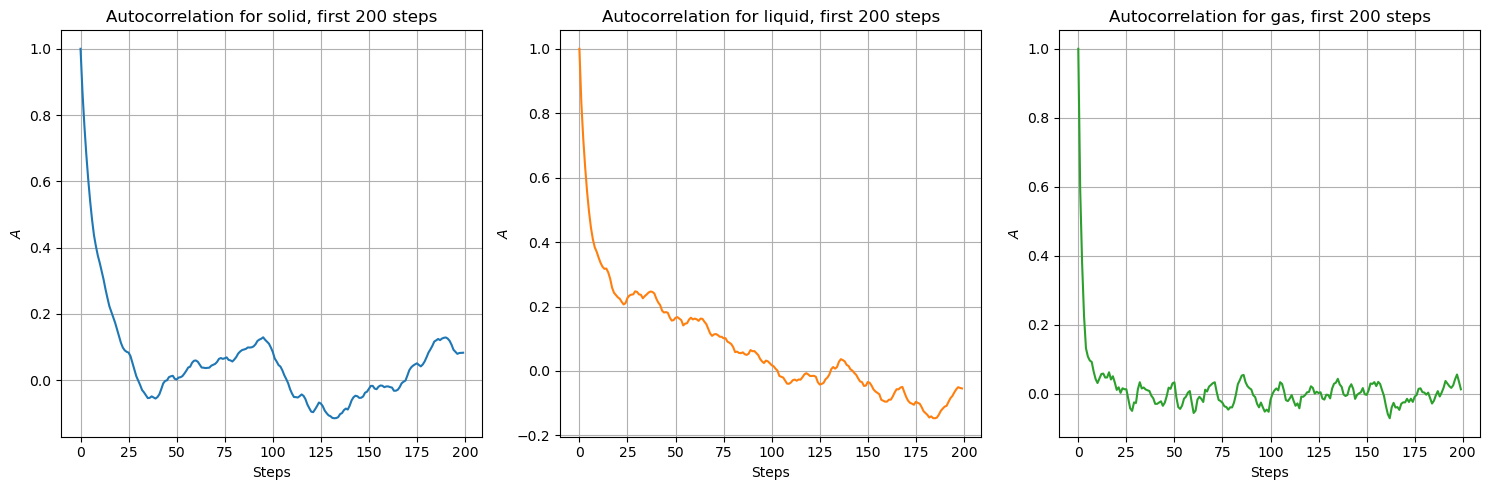

In [22]:
def calculate_autocorrelation(series):
    n = len(series)
    mean = np.mean(series)
    centered_series = series - mean
    autocorrelation = np.correlate(centered_series, centered_series, mode='full')[-n:]
    autocorrelation /= autocorrelation[0]
    return autocorrelation

solid = np.loadtxt("../data/ex07_istant_solid.dat", unpack=True, usecols=(0))
liquid = np.loadtxt("../data/ex07_istant_liquid.dat", unpack=True, usecols=(0))
gas = np.loadtxt("../data/ex07_istant_gas.dat", unpack=True, usecols=(0))

fig = plt.figure(figsize=(15,5))
autocorr = []
for i, series in enumerate([solid, liquid, gas]):
    fig.add_subplot(1,3,i+1)
    autocorr.append(calculate_autocorrelation(series[:2000]))
    plt.plot(autocorr[i], color=colors[i])
    plt.title("Autocorrelation for {phase}".format(phase=names[i]))
    plt.xlabel("Steps")
    plt.ylabel(r"$A$")
    plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15,5))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.plot(autocorr[i][:200], color=colors[i])
    plt.title("Autocorrelation for {phase}, first 200 steps".format(phase=names[i]))
    plt.xlabel("Steps")
    plt.ylabel(r"$A$")
    plt.grid(True)
plt.tight_layout()
plt.show()



In [23]:
def error_blocking(data, block_size):
    n_blocks = len(data) // block_size
    avg = 0
    avg2 = 0
    for i in range(n_blocks):
        sum = 0
        for j in range(block_size):
            sum += data[i*block_size+j]
        sum /= block_size
        avg += sum
        avg2 += sum*sum
    avg /= n_blocks
    avg2 /= n_blocks
    return math.sqrt((avg2 - avg*avg) / n_blocks)

blck_len = range(10, 5000, 10)
errors = []
for i, series in enumerate([solid, liquid, gas]):
    print("Calculating error for {phase}".format(phase=names[i]))
    errors.append([error_blocking(series, block_len) for block_len in blck_len])


Calculating error for solid
Calculating error for liquid
Calculating error for gas


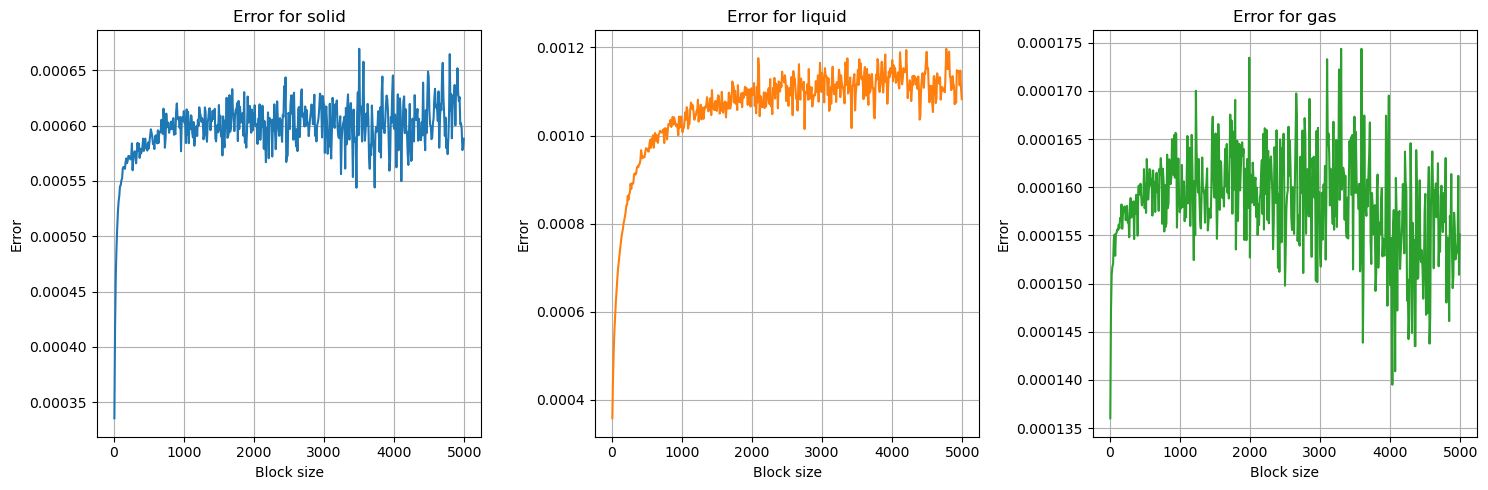

In [24]:

fig = plt.figure(figsize=(15,5))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.plot(blck_len, errors[i], color=colors[i])
    plt.title("Error for {phase}".format(phase=names[i]))
    plt.xlabel("Block size")
    plt.ylabel("Error")
    plt.grid(True)
plt.tight_layout()
plt.show()